# Les causes du retard et d'annulation des vols
## by Mariam COULIBALY

## Investigation Overview

Dans cette enquête, je voulais connaitre le pourcentage des vols annulés et detournés, la cause principale de retard et d'annulation des vols.La relation entre le retard de depart et d'arrivé.Le nombre d'annulation  et de retards des vols par transporteurs.

## Dataset Overview

Cet ensemble de données se rapporte aux vols des États-Unis en 2008, y compris les transporteurs, les raisons de l'annulation des vols, les retards à l'arrivée et au départ, et les raisons des retards.Il contient 2.389.217 détails de vols (lignes) avec 29 caractéristiques(colonnes) y compris:ArrDelay, DepDelay, Cancelled, CancellationCode, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay etc.La plupart des variables sont numériques, mais certaines sont catégorielles.

Un vol est considéré comme retardé  si heure de départ/arrivée réelle est superieur à l'heure de départ/arrivée prévue. En d'autre terne si retard d'arrivée ou de départ est positive(supéieur à 0).

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
vols2008=pd.read_csv("2008.csv")

In [3]:
vols2008_clean=vols2008.copy()

In [4]:
#convertir Cancelled, CancellationCode, Diverted de type categorie
columns_var_dict = {'Cancelled': [0,1],'CancellationCode': ['A' ,'B' ,'C', 'D'],'Diverted': [0,1]}
for column in columns_var_dict:
    type = pd.api.types.CategoricalDtype(ordered = True,categories=columns_var_dict[column])
    vols2008_clean[column] = vols2008_clean[column].astype(type)

## Distribution de Cancelled, Diverted

on peut voir que **2.7%** des vols ont été annulé et seulement **0.2%** ont été detourné.

In [5]:
#créons la fonction affiche_graphique_labels(titre,xlabel,ylabel,sizetitre) qui va affiche le titre, xlabel,
#ylabel et fontsize du graphique
def affiche_graphique_labels(titre,xlabel,ylabel, sizetitre):
    plt.title(titre,fontsize=sizetitre);
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return plt

In [6]:
#fonction pour affiche le graphiques des frequences relatives
def plot_freq_rela(df,var_column):
    # Retourner la somme de toutes les valeurs non nulles de la colonne « var_column »
    n=df.shape[0]
    var_column_counts=df[var_column].value_counts()
    # Retourner la fréquence la plus élevée dans la colonne « type »
    max_count=df[var_column].value_counts().max()
    max_prop=max_count/n
    #plot
    base_color = sb.color_palette()[0]
    ticks=np.arange(0,max_prop,0.1)
    ticks_names=['{:0.1f}'.format(v) for v in ticks]
    #Changer les emplacements des ticks et les étiquettes
    plt.yticks(ticks*n,ticks_names)
    sb.countplot(data = df, x = var_column, color = base_color);

    # Obtenir les emplacements et les étiquettes des ticks actuels
    locs, labels = plt.xticks(rotation=0)

    # Boucler sur chaque paire d'emplacements et d'étiquettes
    for loc, label in zip(locs, labels):
        # récupérer la propriété texte de l'étiquette pour obtenir le compte correct
        count = var_column_counts[int(label.get_text())]
        # Convertir count en pourcentage, puis en chaîne de caractères
        pct_string = '{:0.1f}%'.format(100*count/n)
        
        # imprimer l'annotation juste en dessous du haut de la barre
        plt.text(loc, 0.92*count, pct_string, ha = 'center', color = 'black')

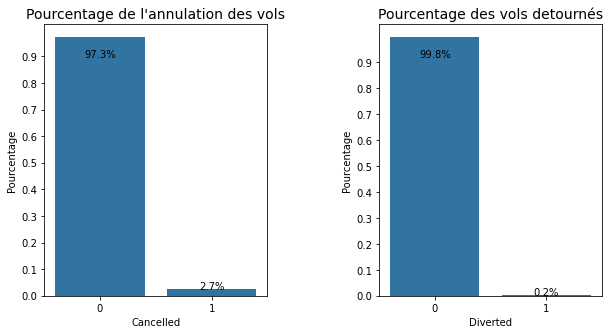

In [7]:
#frequences relatives: annulation et detournement des vols
plt.figure(figsize = [10, 5])
plt.subplots_adjust(hspace=1,wspace=0.5)

plt.subplot(1, 2, 1)
plot_freq_rela(vols2008_clean,'Cancelled')
affiche_graphique_labels("Pourcentage de l'annulation des vols",'Cancelled','Pourcentage',14);

plt.subplot(1, 2, 2)
plot_freq_rela(vols2008_clean,'Diverted')
affiche_graphique_labels("Pourcentage des vols detournés",'Diverted','Pourcentage',14);

##  Distribution du CancellationCode

La cause la plus fréquente d'annulation des vols est le **transporteur (A) soit 40.46%**, suivie de la **météo (B) soit 39.95%** et le **Système national d'espace aérien ou National Airspace System en anglais (C) soit 19.58%**. Il n'y a presque pas d'annulation des vols pour des raisons de **sécurité (D) soit 0.01%**.

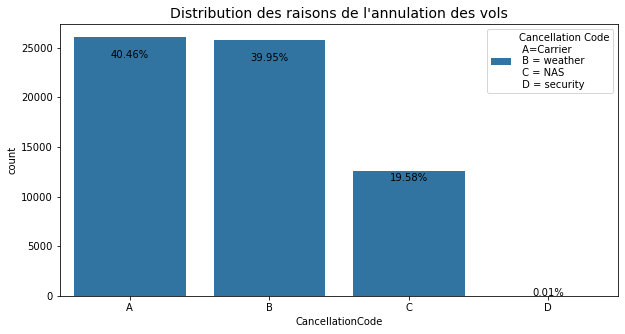

In [8]:
base_color = sb.color_palette()[0]
plt.figure(figsize=(10, 5))
sb.countplot(data = vols2008_clean, x = 'CancellationCode', color = base_color);

# ajouter les annotations sur la proportion des vols annulés
var_counts=vols2008_clean['CancellationCode'].value_counts()
n=var_counts.sum()
locs, labels = plt.xticks()

# Boucler sur chaque paire d'emplacements et d'étiquettes
for loc, label in zip(locs, labels):
    # récupérer la propriété texte de l'étiquette pour obtenir le compte correct
    count = var_counts[label.get_text()]
    # Convertir count en pourcentage, puis en chaîne de caractères
    pct_string = '{:0.2f}%'.format(100*count/n)

    # imprimer l'annotation à la barre
    plt.text(loc, 0.92*count, pct_string, ha = 'center', color = 'black')
    plt.title("Distribution des raisons de l'annulation des vols",fontsize=14)
    plt.legend(['Cancellation Code\n A=Carrier\n B = weather \n C = NAS \n D = security'])

## Distribution du retard par causes

La cause principal du retard des vols est due au **LateAircraftDelay** soit **37.52%**, suivi du **NAS** ( Système national d'espace aérien ou National Airspace System en anglais) avec **28.90%**, suivi des **transporteurs (CarrierDelay) avec 28.18%** et les **conditions météorologique (WeatherDelay) avec 5.26%**.Il n'y a presque pas du retard des vols cause par la **sécurité(SecurityDelay) avec 0.14%**

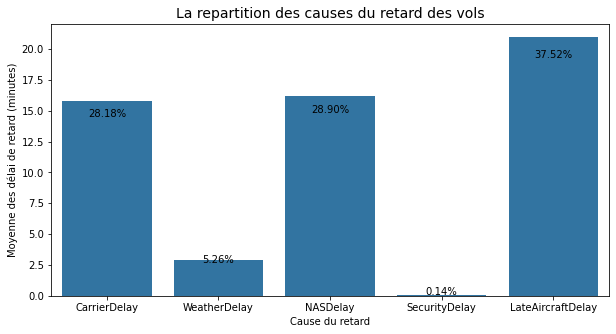

In [9]:
base_color = sb.color_palette()[0]
plt.figure(figsize=(10, 5))
columns=['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']
means = [vols2008_clean[i].mean() for i in columns]
data = pd.Series(means, index=columns)
sb.barplot(data.index,data.values,color = base_color);
n=data.sum()

# Obtenir les emplacements et les étiquettes des ticks actuels
locs, labels = plt.xticks()
# Boucler sur chaque paire d'emplacements et d'étiquettes
for loc, label in zip(locs, labels):
    # récupérer la propriété texte de l'étiquette pour obtenir le compte correct
    count = data[label.get_text()]
    # Convertir count en pourcentage, puis en chaîne de caractères
    pct_string = '{:0.2f}%'.format(100*count/n)
    # imprimer l'annotation juste en dessous du haut de la barre
    plt.text(loc, 0.92*count, pct_string, ha = 'center', color = 'black')
    
affiche_graphique_labels("La repartition des causes du retard des vols",'Cause du retard',
                         'Moyenne des délai de retard (minutes)',14);

## ArrDelay vs. DepDelay

Il existe une forte correlation positive entre le retard du depart et à l'arrivée, ceci semble logique car un retard de depart va forcement entraine un retard à l'arrivé.

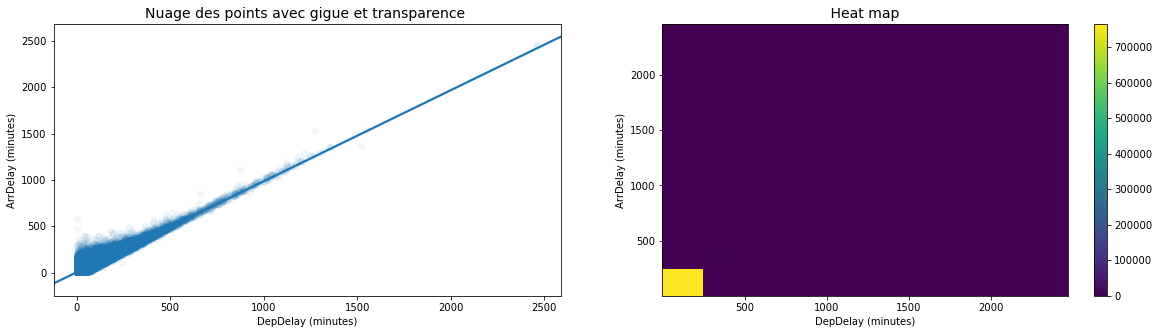

In [10]:
vols2008_Delay=vols2008_clean[(vols2008_clean['DepDelay']>0) & (vols2008_clean['ArrDelay']>0)]


plt.figure(figsize = [20, 5])

#Graphique de gauche- nuage avec gigue et transparence
plt.subplot(1, 2, 1)
sb.regplot(data=vols2008_Delay,x='DepDelay', y='ArrDelay', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/20});
affiche_graphique_labels("Nuage des points avec gigue et transparence ",'DepDelay (minutes)','ArrDelay (minutes)',14);
# Graphique de droite- heat map
plt.subplot(1, 2, 2)
plt.hist2d(data=vols2008_Delay, x='DepDelay', y='ArrDelay')
plt.colorbar() 
affiche_graphique_labels(" Heat map ",'DepDelay (minutes)','ArrDelay (minutes)',14);

## UniqueCarrier vs. Cancelled

**AA** est le transporteur qui à fait le **maximum** d'annulation des vols, suivi **MQ, OO, YV et UA. AQ** est le transporteur qui à fait le minimum d'annulation des vols, suivi de  **F9, HA, AS et B6**.

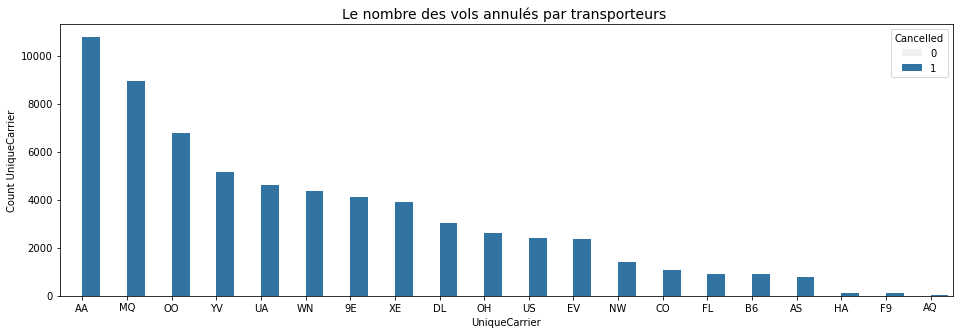

In [11]:
vols2008_cancelled=vols2008_clean[vols2008_clean['Cancelled']==1]
ordreUniqueCarrier=vols2008_cancelled.groupby(['UniqueCarrier']).Cancelled.count().sort_values(ascending=False).index
base_color = sb.color_palette()[0] 

plt.figure(figsize = [16, 5])
sb.countplot(data=vols2008_cancelled, x='UniqueCarrier', hue='Cancelled', color=base_color, order=ordreUniqueCarrier)
affiche_graphique_labels("Le nombre des vols annulés par transporteurs ",'UniqueCarrier','Count UniqueCarrier',14);


## UniqueCarrier vs.DepDelay & UniqueCarrier vs. ArrDelay

 **YV** est le transporteur qui à fait le **maximum** de la moyenne de retard des vols au depart suivi de  **B6, OH, 9E, UA. AQ** est le transporteur qui à fait le **minimum** de la moyenne de retard au depart des vols suivi de **HA, F9, WN, US**. **YV** est le transporteur qui à fait le **maximum** de la moyenne de retard des vols à l'arrivé suivi de **B6, UA, MQ,EV. AQ** est le transporteur qui à fait le **minimum** de la moyenne de retard des vols à l'arrivé suivi de **HA, F9, WN, DL**.

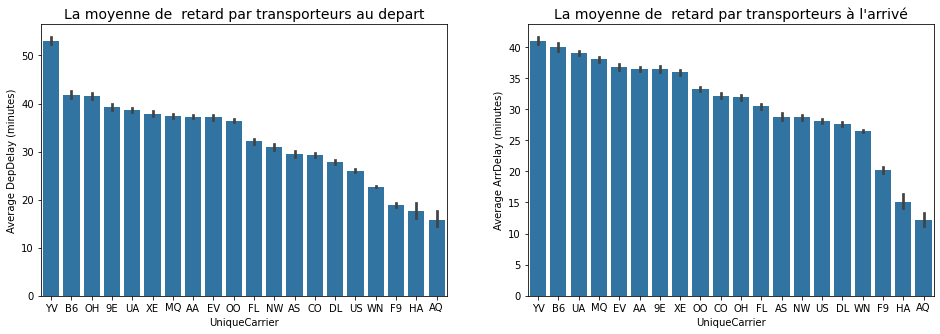

In [12]:
vols2008_DepDelay=vols2008_clean[vols2008_clean['DepDelay']>0]
vols2008_ArrDelay=vols2008_clean[vols2008_clean['ArrDelay']>0]

ordreUniqueCarrierDepDelay=vols2008_DepDelay.groupby(['UniqueCarrier']).DepDelay.mean().sort_values(ascending=False).index
ordreUniqueCarrierArrDelay=vols2008_ArrDelay.groupby(['UniqueCarrier']).ArrDelay.mean().sort_values(ascending=False).index

plt.figure(figsize = [16, 5])
plt.subplots_adjust(hspace=0.4)
plt.subplot(1, 2, 1)
sb.barplot(data=vols2008_DepDelay, x='UniqueCarrier', y='DepDelay', color=base_color, order=ordreUniqueCarrierDepDelay)
affiche_graphique_labels("La moyenne de  retard par transporteurs au depart",'UniqueCarrier','Average DepDelay (minutes)',14);

plt.subplot(1, 2, 2)
sb.barplot(data=vols2008_ArrDelay, x='UniqueCarrier', y='ArrDelay', color=base_color, order=ordreUniqueCarrierArrDelay)
affiche_graphique_labels("La moyenne de  retard par transporteurs à l'arrivé",'UniqueCarrier','Average ArrDelay (minutes)',14);